## Creating CNN Using Scratch 

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Colab Notebooks/Dataset/Train'
valid_path = '/content/drive/MyDrive/Colab Notebooks/Dataset/Test'


In [ ]:
from tensorflow.keras.layers import MaxPooling2D

In [ ]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [ ]:
training_set

In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
13/13 [==============================] - 87s 6s/step - loss: 1.0541 - accuracy: 0.5526 - val_loss: 0.7364 - val_accuracy: 0.6642
Epoch 2/50
13/13 [==============================] - 5s 409ms/step - loss: 0.5228 - accuracy: 0.7267 - val_loss: 1.1968 - val_accuracy: 0.3582
Epoch 3/50
13/13 [==============================] - 5s 408ms/step - loss: 0.4409 - accuracy: 0.7712 - val_loss: 1.2744 - val_accuracy: 0.3955
Epoch 4/50
13/13 [==============================] - 5s 408ms/step - loss: 0.4539 - accuracy: 0.7732 - val_loss: 0.7863 - val_accuracy: 0.5821
Epoch 5/50
13/13 [==============================] - 5s 420ms/step - loss: 0.4197 - accuracy: 0.8183 - val_loss: 0.6390 - val_accuracy: 0.6269
Epoch 6/50
13/13 [==============================] - 5s 409ms/step - loss: 0.3204 - accuracy: 0.8718 - val_loss: 0.7252 - val_accuracy: 0.5896
Epoch 7/50
13/13 [==============================] - 5s 412ms/step - loss: 0.2687 - accuracy: 0.8982 - val_loss: 0.6868 - val_accuracy: 0.6194
Epoch 8/

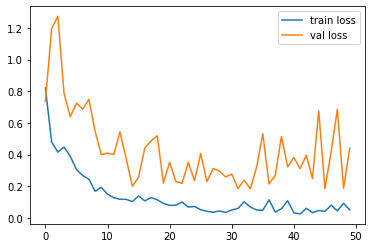

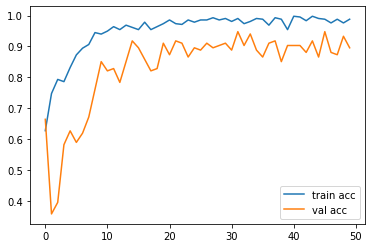

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [ ]:

y_pred = model.predict(test_set)


In [ ]:
y_pred

array([[4.3632207e-03, 9.9563676e-01],
       [1.0000000e+00, 2.9756853e-09],
       [9.9992681e-01, 7.3222924e-05],
       [9.9998772e-01, 1.2309944e-05],
       [9.9949014e-01, 5.0987437e-04],
       [6.1653131e-03, 9.9383473e-01],
       [1.2427411e-02, 9.8757255e-01],
       [2.9178741e-03, 9.9708205e-01],
       [9.9999678e-01, 3.1765007e-06],
       [4.2348951e-02, 9.5765108e-01],
       [1.0000000e+00, 3.6882905e-10],
       [9.2277927e-03, 9.9077225e-01],
       [9.9999082e-01, 9.1315715e-06],
       [1.0000000e+00, 2.7225449e-09],
       [9.6789616e-01, 3.2103851e-02],
       [9.9992239e-01, 7.7614517e-05],
       [1.0000000e+00, 7.9217431e-21],
       [1.0000000e+00, 4.2049195e-10],
       [9.9999702e-01, 2.9269502e-06],
       [9.9995935e-01, 4.0650746e-05],
       [9.7849192e-03, 9.9021506e-01],
       [1.5246281e-01, 8.4753722e-01],
       [9.9986100e-01, 1.3899856e-04],
       [1.0000000e+00, 1.3084471e-22],
       [1.0000000e+00, 1.9895676e-12],
       [9.9984682e-01, 1.

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_vgg19.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/Colab Notebooks/Dataset/Test/Uninfected/2.png',target_size=(224,224))



In [ ]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[1., 0.]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
if(a==0):
    print("Uninfected")
else:
    print("Infected")

Uninfected
